# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [2]:
def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    ##data=np.load('dataset1_1.npz')        importing data files
    ##lis=data.files                        list of array names
    
                        
        
             ##ML estimate of mean of negative & positive data points
        
    s_p=sum(X_train[Y_train==1])
    s_n=sum(X_train[Y_train==-1])
    n_p=len(X_train[Y_train==1])
    n_n=len(X_train[Y_train==-1])
    
    
    mean_neg=s_n/n_n
    mean_pos=s_p/n_p
    
    
                        
    n=n_n+n_p
    P_n=n_n/n  ##P(Y=-1)
    P_p=1-P_n  ##P(Y=+1)   
    
                ##function for estimating Bayes_classifer
        
        
    
    def predict_class(x):              ##P(Y=+1/X=x)
        pred=0
        w=mean_pos-mean_neg
        
        b=(1/2*(np.dot(mean_neg.transpose(),mean_neg)-np.dot(mean_pos.transpose(),mean_pos)))+np.log(P_p/P_n)
    
        P_p_x=1/(1+np.exp(-((np.dot(w.transpose(),x))+b)))
        
        if P_p_x>=0.5:
            pred=+1
        else:
            pred=-1
        return pred
    
                                     ##Y_test_pred for X_test
    Y_test_pred=np.array([])
    for sample in X_test:
        i=predict_class(sample)
        Y_test_pred=np.append(Y_test_pred,[i])
   
        
    return Y_test_pred
    
    

def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    
          ##ML estimate of mean of negative/positive data points
    s_p=sum(X_train[Y_train==1])
    s_n=sum(X_train[Y_train==-1])
    n_p=len(X_train[Y_train==1])
    n_n=len(X_train[Y_train==-1])
    
    
    mean_neg=s_n/n_n
    mean_pos=s_p/n_p
    
    
                        
    n=n_n+n_p
    P_n=n_n/n  ##P(Y=-1)
    P_p=1-P_n  ##P(Y=+1)
    
    
    
                     ##ML estimate of sigma matrix
    X_train_p = X_train[Y_train==1]  - mean_pos
    X_train_n = X_train[Y_train==-1] - mean_neg
    
    l=len(X_train[1])
    s_p=np.zeros((l,l))         # dimensional
    s_n=np.zeros((l,l))
    
    for i in range(len(X_train_p)):
        vec  = X_train_p[i][np.newaxis] ##(imp) see shape of 1d array, try transposing it, it wont get transposed. 
        s_p+= vec.transpose().dot(vec) ##see ml estimate of sigma
        
        
    for i in range(len(X_train_n)):    
        vec  = X_train_n[i][np.newaxis]
        s_n+= vec.transpose().dot(vec)
        
        
    sigma=(s_p+s_n)/len(X_train)    
    
    
    
                 ##function for estimating Bayes_classifer
        
    def predict_class(x):              ##P(Y=+1/X=x)
        pred=0
        
        ##see formula for posterior
        
        d_p = x-mean_pos
        d_n = x-mean_neg
        num    = (np.exp((-1/2)*(d_p.dot(np.linalg.inv(sigma).dot(d_p)))))*P_p
        to_add = (np.exp((-1/2)*(d_n.dot(np.linalg.inv(sigma).dot(d_n)))))*P_n
        den=num+to_add
        
        P_p_x=num/den
        
        if P_p_x>=0.5:
            pred=+1
        else:
            pred=-1
        return pred
    
                                     ##Y_test_pred for X_test
    Y_test_pred=np.array([])
    for sample in X_test:
        i=predict_class(sample)
        Y_test_pred=np.append(Y_test_pred,[i])
   
    return Y_test_pred
        
        
    

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """

    ##ML estimate of mean of negative/positive data points
    s_p=sum(X_train[Y_train==1])
    s_n=sum(X_train[Y_train==-1])
    n_p=len(X_train[Y_train==1])
    n_n=len(X_train[Y_train==-1])
    
    
    mean_neg=s_n/n_n
    mean_pos=s_p/n_p
    
    
                        
    n=n_n+n_p
    P_n=n_n/n  ##P(Y=-1)
    P_p=1-P_n  ##P(Y=+1)
    
    
    
                     ##ML estimate of sigma matrices
        
    X_train_p = X_train[Y_train==1]  - mean_pos
    X_train_n = X_train[Y_train==-1] - mean_neg
    
    l=len(X_train[1])
    s_p=np.zeros((l,l))         # dimensional
    s_n=np.zeros((l,l))
    
    for i in range(len(X_train_p)):
        vec  = X_train_p[i][np.newaxis] ##(imp) see shape of 1d array, try transposing it, it wont get transposed. 
        s_p+= vec.transpose().dot(vec)  ##see ml estimate of sigma
    
    sigma_pos=s_p/n_p
    #print('sigma pos',sigma_pos)    
    for j in range(len(X_train_n)):    
        vec  = X_train_n[j][np.newaxis]
        s_n+= vec.transpose().dot(vec)
    
    sigma_neg=s_n/n_n  
       
    
                     ##function for estimating Bayes_classifer
        
    def predict_class(x):              ##P(Y=+1/X=x)
        pred=0
        
        ##see formula for posterior
        
       
        
        d_p = x-mean_pos
        d_n = x-mean_neg
        
        
        
        
        poster_p = (np.exp((-1/2)*(d_p.dot(np.linalg.inv(sigma_pos).dot(d_p)))))*P_p/np.sqrt(np.linalg.det(sigma_pos))
        poster_n = (np.exp((-1/2)*(d_n.dot(np.linalg.inv(sigma_neg).dot(d_n)))))*P_n/np.sqrt(np.linalg.det(sigma_neg))
        
        #print(to_add)
        #print(den)
             
        
        if poster_p>=poster_n:
            pred=+1
        else:
            pred=-1
        return pred
    
                                     ##Y_test_pred for X_test
    Y_test_pred=np.array([])
    for sample in X_test:
        i=predict_class(sample)
        Y_test_pred=np.append(Y_test_pred,[i])
    
    return Y_test_pred




In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


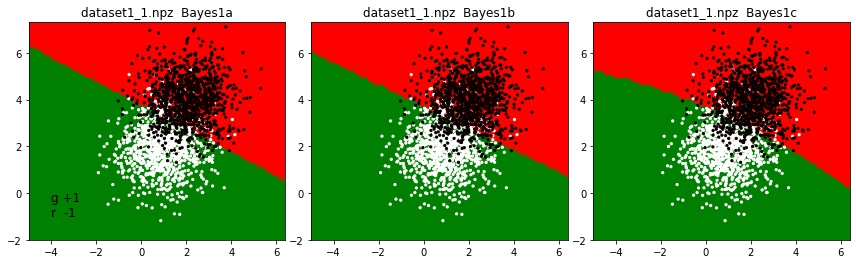

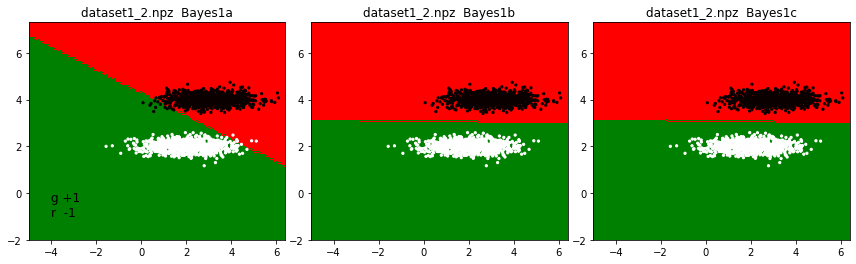

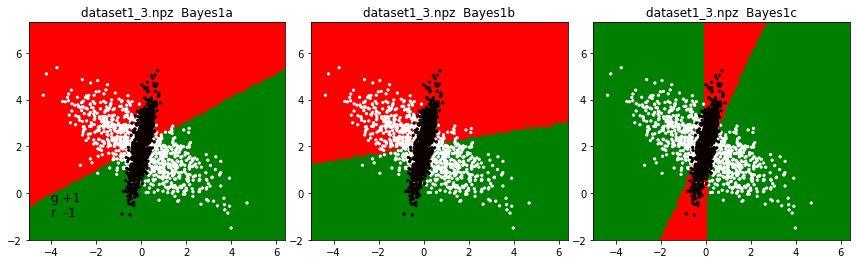

In [4]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)


for nam in ['1','2','3']:
    file='dataset1_'+nam+'.npz'
    
    data=np.load(file)
    lis=data.files

    X_train = data[lis[0]]
    Y_train = data[lis[1]]
    X_test  = data[lis[2]]
    Y_test  = data[lis[3]]



    ##meshgrid for instances to plot classifier
    X,Y = np.meshgrid(np.arange(-5,6.5,0.1),np.arange(-2,7.4,0.1))

    test_instances = np.concatenate( (X.reshape((-1,1)), Y.reshape(-1,1)), axis=1 )

    
    ##using differnt function from above to get classifier and plotting  
        
        
                                  ##Bayes1a
    
    Z_pred = Bayes1a(X_train, Y_train, test_instances)
    Z      = Z_pred.reshape(X.shape)

    fig, axes = plt.subplots(1,3)
    plt.subplot(1,3,1)
    plt.contourf(X,Y,np.sign(Z),colors=['r','g'])
    plt.scatter(X_train[:,0], X_train[:,1],s=5, c=Y_train, cmap='hot', marker='o')
    plt.title(file+'  Bayes1a')
    plt.text(-4, -1, 'g +1''\n''r  -1',fontsize=12)
    
    ##training and test error calculation for bayes1a
    Y_train_pred = Bayes1a(X_train, Y_train, X_train)
    train_err = sum(np.abs(Y_train_pred-Y_train))/(2*len(X_train))
    #print(file+' bayes1a train_err',train_err*100)
    
    Y_test_pred = Bayes1a(X_train, Y_train, X_test)
    test_err = sum(np.abs(Y_test_pred-Y_test))/(2*len(X_test))
    #print(file+' bayes1a test_err',test_err*100)
   

                                ##Bayes1b
     
    Z_pred = Bayes1b(X_train, Y_train, test_instances)
    Z      = Z_pred.reshape(X.shape)


    plt.subplot(1,3,2)
    plt.contourf(X,Y,np.sign(Z),colors=['r','g'])
    plt.scatter(X_train[:,0], X_train[:,1],s=5, c=Y_train, cmap='hot', marker='o')
    plt.title(file+'  Bayes1b')

    ##training and test error calculation for bayes1b
    Y_train_pred = Bayes1b(X_train, Y_train, X_train)
    train_err = sum(np.abs(Y_train_pred-Y_train))/(2*len(X_train))
    #print(file+' bayes1b train_err',train_err*100)
    
    Y_test_pred = Bayes1b(X_train, Y_train, X_test)
    test_err = sum(np.abs(Y_test_pred-Y_test))/(2*len(X_test))
    #print(file+' bayes1b test_err',test_err*100)
    
    
                            ##Bayes1c
    
    Z_pred = Bayes1c(X_train, Y_train, test_instances)
    Z      = Z_pred.reshape(X.shape)

    plt.subplot(1,3,3)
    plt.contourf(X,Y,np.sign(Z),colors=['r','g'])
    plt.scatter(X_train[:,0], X_train[:,1],s=5, c=Y_train, cmap='hot', marker='o')
    plt.title(file+'  Bayes1c')

    plt.subplots_adjust(left=0.1,right=2,wspace=.1, hspace=.1)

    
    Y_train_pred = Bayes1c(X_train, Y_train, X_train)
    train_err = sum(np.abs(Y_train_pred-Y_train))/(2*len(X_train))
    #print(file+' bayes1c train_err',train_err*100)
    
    Y_test_pred = Bayes1c(X_train, Y_train, X_test)
    test_err = sum(np.abs(Y_test_pred-Y_test))/(2*len(X_test))
    #print(file+' bayes1c test_err',test_err*100)


** Cell type : TextWrite ** 
(Write your observations and table of errors here)

<b>Observations</b><br><br>
i) Both classes dataset1_1 seems out be distributed as gaussian with Identity covariance from plot and hence all Bayes1_ classifier gives almost same train and test errors.<br>
ii) It can be noticed that the dataset1_2 is linearly seperable and also similar variance(by looking at class distribution) and hence Bayes1_b gives no classification error. Bayes1_c also gives zero error may be due to ML estimates of $\Sigma_+$ and $\Sigma_-$ comes out be very close. Bayes1_a assumes little more about data which results in some error for dataset1_2 <br>
iii) From plot for dataset1_3 the two class' distributions seems to be having very differnt variation from each other so Bayes1c classifies the data well with lesser training and test errors than other Bayes1_.<br>



<br> <b>Error matrices</b><br>

               
   Train_Error( $\frac{no. of wrong predictions*100}{total predictions}$ )
                        
|            | Bayes1a | Bayes1b | Bayes1c |
|------------|---------|---------|---------|
| dataset1_1 | 13.15   | 13.1    | 13.15   |
| dataset1_2 | .8      | 0.0     | 0.0     |
| dataset1_3 | 48.9    | 49.0    | 11.55   |                        
                        
                                         
                         
   Test_Error

|            | Bayes1a | Bayes1b | Bayes1c |
|------------|---------|---------|---------|
| dataset1_1 | 12.6    | 12.45   | 12.45   |
| dataset1_2 | 0.85    | 0.0     | 0.0     |
| dataset1_3 | 49.7    | 49.5    | 13.5   |

                                    



** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [5]:
# Cell type : CodeWrite
# Fill in functions in this cell

L_mat=np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    
    s_1=sum(X_train[Y_train==1])
    s_2=sum(X_train[Y_train==2])
    s_3=sum(X_train[Y_train==3])
    s_4=sum(X_train[Y_train==4])
    
    n_1=len(X_train[Y_train==1])
    n_2=len(X_train[Y_train==2])
    n_3=len(X_train[Y_train==3])
    n_4=len(X_train[Y_train==4])
    
    mean_1=s_1/n_1
    mean_2=s_2/n_2
    mean_3=s_3/n_3
    mean_4=s_4/n_4
    
    n=n_1+n_2+n_3+n_4
    
    #probabilities of classes
    
    P_1=n_1/n
    P_2=n_2/n
    P_3=n_3/n
    P_4=n_4/n
    
    def neta(x):
        Risks  = np.zeros(4)
        neta   = np.zeros(4)
        neta[0]= np.exp((-1/2)*(np.linalg.norm(x-mean_1))**2)*P_1
        neta[1]= np.exp((-1/2)*(np.linalg.norm(x-mean_2))**2)*P_2
        neta[2]= np.exp((-1/2)*(np.linalg.norm(x-mean_3))**2)*P_3
        neta[3]= np.exp((-1/2)*(np.linalg.norm(x-mean_4))**2)*P_4
        
        
        
        for i in range(4):
            Risks[i]=neta.dot(L_mat[:,i])
            #print('riski''\n',Risks[i])
        min_r_arg=np.argmin(Risks)+1
        #print('class',min_r_arg)
        
        return min_r_arg
    
    Y_test_pred=np.array([])
    for sample in X_test:
        
        Y_test_pred = np.append(Y_test_pred,neta(sample))
        
    
    return Y_test_pred    
        
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    s_1=sum(X_train[Y_train==1])
    s_2=sum(X_train[Y_train==2])
    s_3=sum(X_train[Y_train==3])
    s_4=sum(X_train[Y_train==4])
    
    n_1=len(X_train[Y_train==1])
    n_2=len(X_train[Y_train==2])
    n_3=len(X_train[Y_train==3])
    n_4=len(X_train[Y_train==4])
    
    mean_1=s_1/n_1
    mean_2=s_2/n_2
    mean_3=s_3/n_3
    mean_4=s_4/n_4
    
    n=n_1+n_2+n_3+n_4
    
    #probabilities of classes
    
    P_1=n_1/n
    P_2=n_2/n
    P_3=n_3/n
    P_4=n_4/n
   

                    ## ML estimate of sigma matrix
    
    X_train_1 = X_train[Y_train==1] - mean_1
    X_train_2 = X_train[Y_train==2] - mean_2
    X_train_3 = X_train[Y_train==3] - mean_3
    X_train_4 = X_train[Y_train==4] - mean_4
    
    l=len(X_train[1])
    s_1=np.zeros((l,l))         # dimensional
    s_2=np.zeros((l,l))
    s_3=np.zeros((l,l))         # dimensional
    s_4=np.zeros((l,l))
    
    
    for i in range(len(X_train_1)):
        vec  = X_train_1[i][np.newaxis] ##(imp) see shape of 1d array, try transposing it, it wont get transposed. 
        s_1+= vec.transpose().dot(vec) ##see ml estimate of sigma
        
    for i in range(len(X_train_2)):    
        vec  = X_train_2[i][np.newaxis]
        s_2+= vec.transpose().dot(vec)
    
    for i in range(len(X_train_3)):    
        vec  = X_train_3[i][np.newaxis]
        s_3+= vec.transpose().dot(vec)
   
    for i in range(len(X_train_4)):    
        vec  = X_train_4[i][np.newaxis]
        s_4+= vec.transpose().dot(vec)
        
    
    sigma=(s_1+s_2+s_3+s_4)/n
    
    #print('sigma',sigma)
    
                    ##function taking sample input and outputs predicted class

    def neta(x):
        Risks  = np.zeros(4)
        neta   = np.zeros(4)
        neta[0]= np.exp((-1/2)*((x-mean_1).dot(np.linalg.inv(sigma).dot(x-mean_1))))*P_1
        neta[1]= np.exp((-1/2)*((x-mean_2).dot(np.linalg.inv(sigma).dot(x-mean_2))))*P_2
        neta[2]= np.exp((-1/2)*((x-mean_3).dot(np.linalg.inv(sigma).dot(x-mean_3))))*P_3
        neta[3]= np.exp((-1/2)*((x-mean_4).dot(np.linalg.inv(sigma).dot(x-mean_4))))*P_4
        
        
        
        for i in range(4):
            Risks[i]=neta.dot(L_mat[:,i])
            #print('riski''\n',Risks[i])
        min_r_arg=np.argmin(Risks)+1
        #print('class',min_r_arg)
        
        return min_r_arg
    
    Y_test_pred=np.array([])
    
    for sample in X_test:
        Y_test_pred = np.append(Y_test_pred,neta(sample))
    
    return Y_test_pred
    

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    s_1=sum(X_train[Y_train==1])
    s_2=sum(X_train[Y_train==2])
    s_3=sum(X_train[Y_train==3])
    s_4=sum(X_train[Y_train==4])
    
    n_1=len(X_train[Y_train==1])
    n_2=len(X_train[Y_train==2])
    n_3=len(X_train[Y_train==3])
    n_4=len(X_train[Y_train==4])
    
    mean_1=s_1/n_1
    mean_2=s_2/n_2
    mean_3=s_3/n_3
    mean_4=s_4/n_4
    
    n=n_1+n_2+n_3+n_4
    
    #probabilities of classes
    
    P_1=n_1/n
    P_2=n_2/n
    P_3=n_3/n
    P_4=n_4/n
   

                    ## ML estimate of sigma matrix
    
    X_train_1 = X_train[Y_train==1] - mean_1
    X_train_2 = X_train[Y_train==2] - mean_2
    X_train_3 = X_train[Y_train==3] - mean_3
    X_train_4 = X_train[Y_train==4] - mean_4
    
    l=len(X_train[1])
    s_1=np.zeros((l,l))         # dimensional
    s_2=np.zeros((l,l))
    s_3=np.zeros((l,l))         # dimensional
    s_4=np.zeros((l,l))
    
    
    for i in range(len(X_train_1)):
        vec  = X_train_1[i][np.newaxis] ##(imp) see shape of 1d array, try transposing it, it wont get transposed. 
        s_1+= vec.transpose().dot(vec)  ##see ml estimate of sigma
    sigma_1=s_1/n_1
                        
    for i in range(len(X_train_2)):    
        vec  = X_train_2[i][np.newaxis]
        s_2+= vec.transpose().dot(vec)
    sigma_2=s_2/n_2                    
    
    for i in range(len(X_train_3)):    
        vec  = X_train_3[i][np.newaxis]
        s_3+= vec.transpose().dot(vec)
    sigma_3=s_3/n_3
                        
    for i in range(len(X_train_4)):    
        vec  = X_train_4[i][np.newaxis]
        s_4+= vec.transpose().dot(vec)
    sigma_4=s_4/n_4    
    
    #print('sigmas bayes2c''\n',sigma_1,'\n',sigma_2,'\n',sigma_3,'\n',sigma_4,'\n')
                    ##function taking sample input and outputs predicted class

    def neta(x):
        Risks  = np.zeros(4)
        neta   = np.zeros(4)
        neta[0]= np.exp((-1/2)*((x-mean_1).dot(np.linalg.inv(sigma_1).dot(x-mean_1))))*P_1/np.sqrt(np.linalg.det(sigma_1))
        neta[1]= np.exp((-1/2)*((x-mean_2).dot(np.linalg.inv(sigma_2).dot(x-mean_2))))*P_2/np.sqrt(np.linalg.det(sigma_2))
        neta[2]= np.exp((-1/2)*((x-mean_3).dot(np.linalg.inv(sigma_3).dot(x-mean_3))))*P_3/np.sqrt(np.linalg.det(sigma_3))
        neta[3]= np.exp((-1/2)*((x-mean_4).dot(np.linalg.inv(sigma_4).dot(x-mean_4))))*P_4/np.sqrt(np.linalg.det(sigma_4))
        
        
        
        for i in range(4):
            Risks[i]=neta.dot(L_mat[:,i])
            #print('riski''\n',Risks[i])
        min_r_arg=np.argmin(Risks)+1
        #print('class',min_r_arg)
        
        return min_r_arg
    
    Y_test_pred=np.array([])
    for sample in X_test:
        Y_test_pred = np.append(Y_test_pred,neta(sample))
        
    
    return Y_test_pred
    
    


    


In [6]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


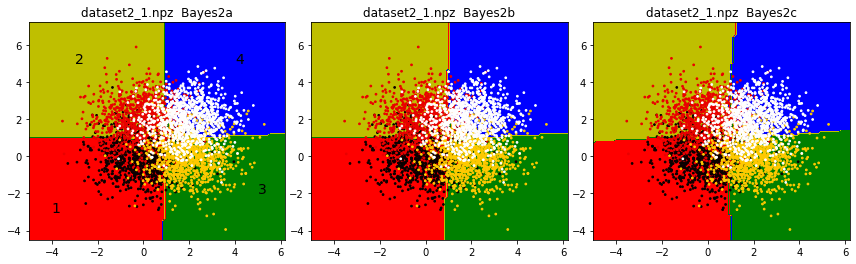

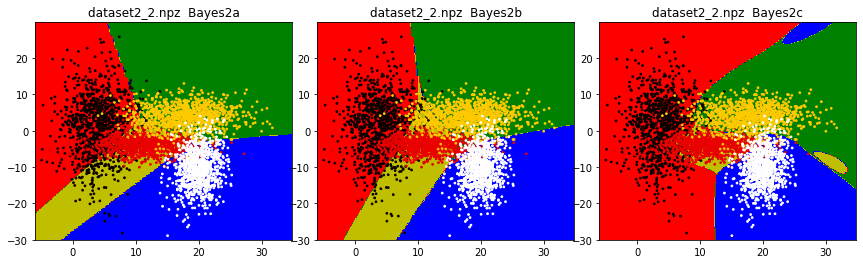

In [7]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

L_mat=np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

for nam in ['1','2']:
    file='dataset2_'+nam+'.npz'
    
    data=np.load(file)
    lis=data.files

    X_train = data[lis[0]]
    Y_train = data[lis[1]]
    X_test  = data[lis[2]]
    Y_test  = data[lis[3]]



    ##meshgrid for instances to plot classifier
    if nam=='1':
        X,Y = np.meshgrid(np.arange(-5,6.3,0.1),np.arange(-4.5,7.3,0.1))
    else:
        X,Y = np.meshgrid(np.arange(-6,35,0.2),np.arange(-30,30,0.2))
    test_instances = np.concatenate( (X.reshape((-1,1)), Y.reshape(-1,1)), axis=1 )

    ##using differnt function from above to get classifier and plotting  

                           ##Bayes2a
        
    Z_pred = Bayes2a(X_train, Y_train, test_instances)
    Z      = Z_pred.reshape(X.shape)

    fig, axes = plt.subplots(1,3)
    plt.subplot(1,3,1)
    plt.contourf(X,Y,Z,colors=['r','g','y','b'])
    plt.scatter(X_train[:,0], X_train[:,1],s=3, c=Y_train, cmap='hot', marker='o')
    plt.title(file+'  Bayes2a')
    if nam=='1':
        plt.text(-4,-3,'1',fontsize=14)
        plt.text(-3,5,'2',fontsize=14)
        plt.text(5,-2,'3',fontsize=14)
        plt.text(4,5,'4',fontsize=14)
    ##calculating test error
    conf_mat=np.zeros((4,4))
    Y_test_pred=Bayes2a(X_train, Y_train, X_test)
    for i,j in zip(Y_test,Y_test_pred):
        i=int(i)
        j=int(j)
        conf_mat[i-1][j-1]+=1

    #print(file+' bayes2a''\n',conf_mat)
    
    test_err=sum(sum(conf_mat*L_mat))   
        
    #print(file+' bayes2a',test_err)
    
                          ##Bayes2b
    Z_pred = Bayes2b(X_train, Y_train, test_instances)
    Z      = Z_pred.reshape(X.shape)


    plt.subplot(1,3,2)
    plt.contourf(X,Y,Z,colors=['r','g','y','b'])
    plt.scatter(X_train[:,0], X_train[:,1],s=3, c=Y_train, cmap='hot', marker='o')
    plt.title(file+'  Bayes2b')


    ##calculating test error
    conf_mat=np.zeros((4,4))
    Y_test_pred=Bayes2b(X_train, Y_train, X_test)
    for i,j in zip(Y_test,Y_test_pred):
        i=int(i)
        j=int(j)
        conf_mat[i-1][j-1]+=1
    #print(file+' bayes2b''\n',conf_mat)  
    test_err=sum(sum(conf_mat*L_mat))

    #print(file+' bayes2b',test_err)
    
    
                           ##Bayes2c
        
    Z_pred = Bayes2c(X_train, Y_train, test_instances)
    Z      = Z_pred.reshape(X.shape)

    plt.subplot(1,3,3)
    plt.contourf(X,Y,Z,colors=['r','g','y','b'])
    plt.scatter(X_train[:,0], X_train[:,1],s=3, c=Y_train, cmap='hot', marker='o')
    plt.title(file+'  Bayes2c')

    
    ##calculating test error
    conf_mat=np.zeros((4,4))
    Y_test_pred=Bayes2c(X_train, Y_train, X_test)
    for i,j in zip(Y_test,Y_test_pred):
        i=int(i)
        j=int(j)
        conf_mat[i-1][j-1]+=1
    #print(file+' bayes2c''\n',conf_mat)

    test_err=sum(sum(conf_mat*L_mat))

    #print(file+' bayes2c',test_err)
    
    
    plt.subplots_adjust(left=0.1,right=2,wspace=.1, hspace=.1)

    

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

<b>Observations</b><br><br>
i) dataset2_1 seems to be containing classes distributed as gaussian with identity matrix and so all Bayes2_ classifer gives almost same expected loss<br>
ii) dataset2_2 have classes with different distibutions i.e. different covariance matrices and hence Bayes2_c gives lowest expected loss.<br> 

<b>Expected Loss</b>=sum of elements of (confusion matrix.*Loss matrix)(element wise multiplication)
<br><br>

|            | Bayes2a | Bayes2b | Bayes2c |
|------------|---------|---------|---------|
| dataset2_1 | 1719    | 1716    | 1711    |
| dataset2_2 | 734     | 758     | 563     |


<b>Confusion matrices</b><br><br>
dataset2_1<br><br>
i)Bayes2a

|              | pred_class=1 | pred_class=2 | pred_class=3 | pred_class=4 |
|--------------|--------------|--------------|--------------|--------------|
| true_class=1 | 633          | 219          | 136          | 12           |
| true_class=2 | 97           | 738          | 62           | 103          |
| true_class=3 | 86           | 49           | 770          | 95           |
| true_class=4 | 15           | 136          | 194          | 655          |

ii)Bayes2b

|              | pred_class=1 | pred_class=2 | pred_class=3 | pred_class=4 |
|--------------|--------------|--------------|--------------|--------------|
| true_class=1 | 633          | 218          | 137          | 12           |
| true_class=2 | 95           | 743          | 60           | 102          |
| true_class=3 | 84           | 49           | 773          | 94           |
| true_class=4 | 16           | 137          | 196          | 651          |

iii)Bayes2c

|              | pred_class=1 | pred_class=2 | pred_class=3 | pred_class=4 |
|--------------|--------------|--------------|--------------|--------------|
| true_class=1 | 634          | 217          | 138          | 11           |
| true_class=2 | 99           | 742          | 61           | 98          |
| true_class=3 | 87           | 47           | 772          | 94           |
| true_class=4 | 15           | 134          | 201          | 650          |
<br><br>

dataset2_2<br>

i)Bayes2a

|              | pred_class=1 | pred_class=2 | pred_class=3 | pred_class=4 |
|--------------|--------------|--------------|--------------|--------------|
| true_class=1 | 830          | 150          | 18           | 2            |
| true_class=2 | 93           | 784          | 46           | 77           |
| true_class=3 | 30           | 61           | 905          | 4            |
| true_class=4 | 0            | 23           | 78           | 899          |

ii)Bayes2b

|              | pred_class=1 | pred_class=2 | pred_class=3 | pred_class=4 |
|--------------|--------------|--------------|--------------|--------------|
| true_class=1 | 891          | 106          | 3            | 0            |
| true_class=2 | 119          | 691          | 124          | 66           |
| true_class=3 | 23           | 106          | 864          | 7            |
| true_class=4 | 0            | 5            | 102          | 893          |

iii)Bayes2c

|              | pred_class=1 | pred_class=2 | pred_class=3 | pred_class=4 |
|--------------|--------------|--------------|--------------|--------------|
| true_class=1 | 901          | 80           | 19           | 0            |
| true_class=2 | 64           | 824          | 46           | 66           |
| true_class=3 | 19           | 31           | 936          | 14           |
| true_class=4 | 0            | 36           | 48           | 916          |

**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:211: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 432x288 with 0 Axes>

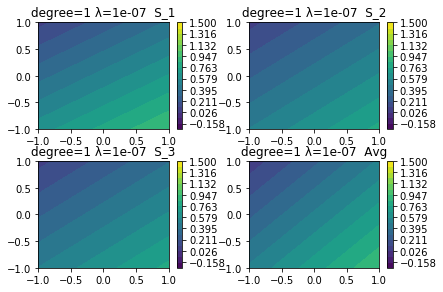

<Figure size 432x288 with 0 Axes>

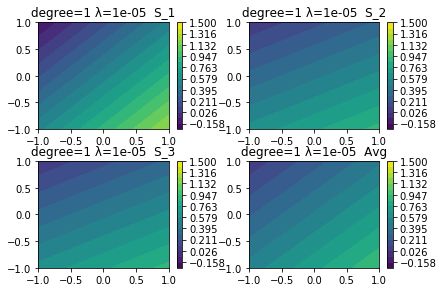

<Figure size 432x288 with 0 Axes>

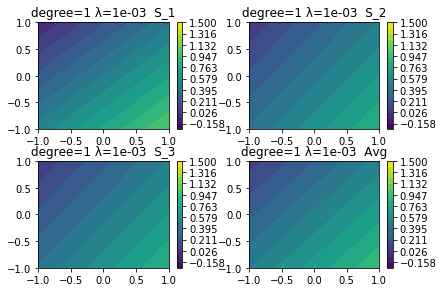

<Figure size 432x288 with 0 Axes>

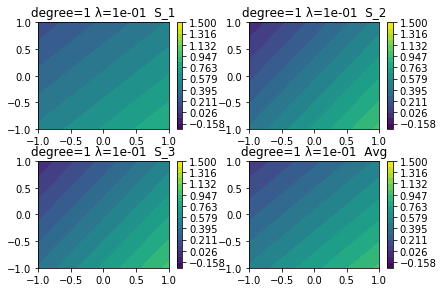

<Figure size 432x288 with 0 Axes>

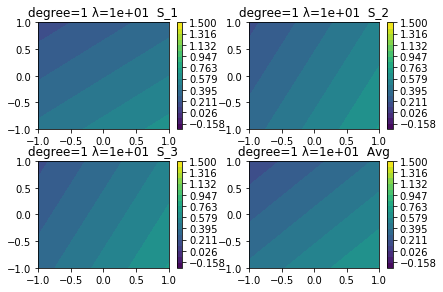

<Figure size 432x288 with 0 Axes>

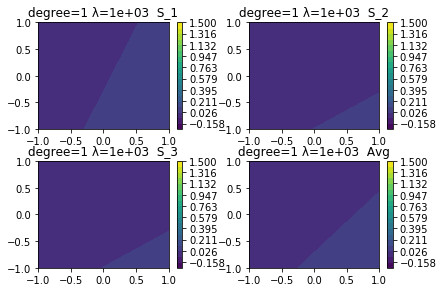

<Figure size 432x288 with 0 Axes>

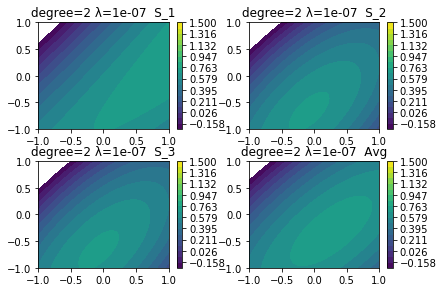

<Figure size 432x288 with 0 Axes>

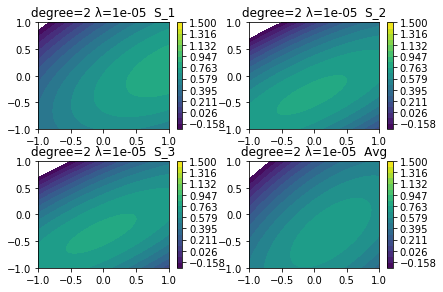

<Figure size 432x288 with 0 Axes>

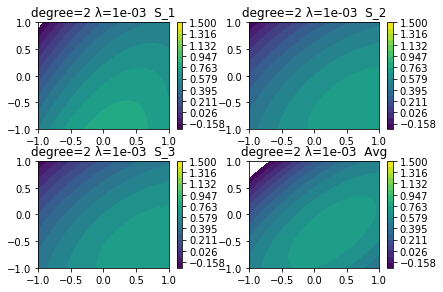

<Figure size 432x288 with 0 Axes>

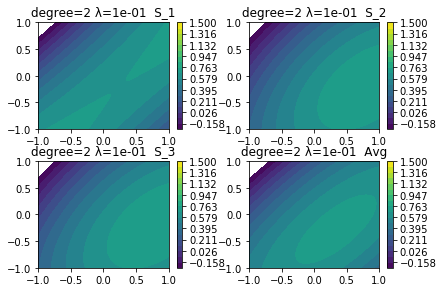

<Figure size 432x288 with 0 Axes>

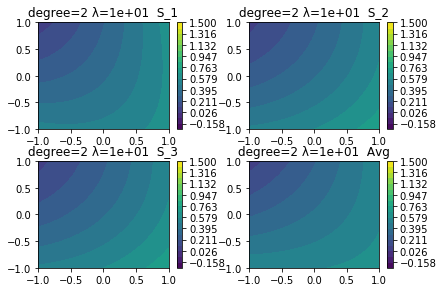

<Figure size 432x288 with 0 Axes>

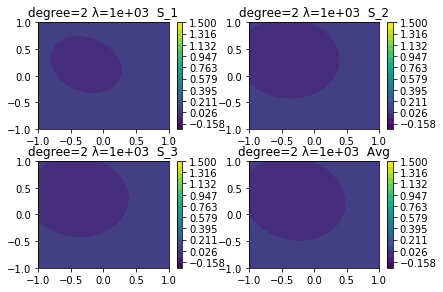

<Figure size 432x288 with 0 Axes>

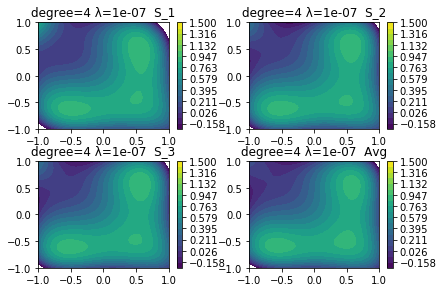

<Figure size 432x288 with 0 Axes>

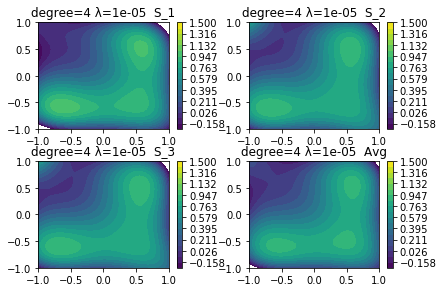

<Figure size 432x288 with 0 Axes>

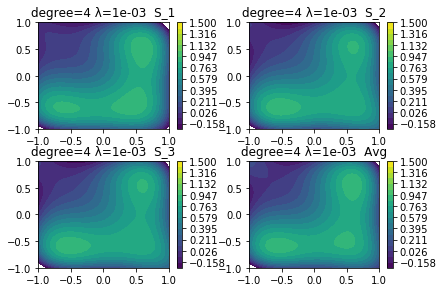

<Figure size 432x288 with 0 Axes>

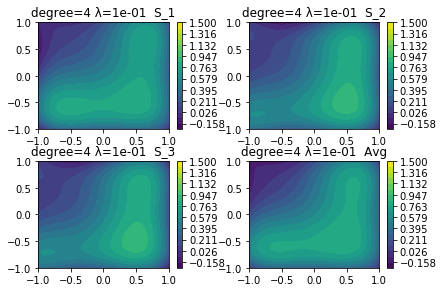

<Figure size 432x288 with 0 Axes>

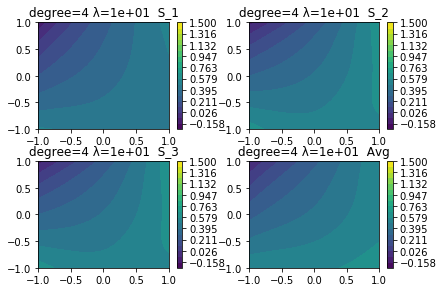

<Figure size 432x288 with 0 Axes>

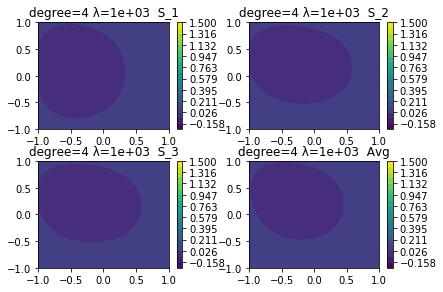

<Figure size 432x288 with 0 Axes>

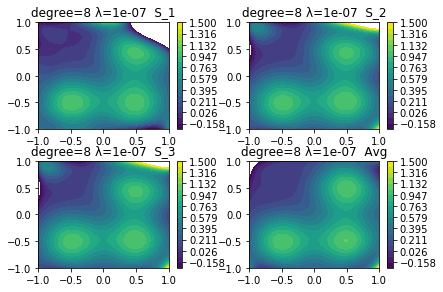

<Figure size 432x288 with 0 Axes>

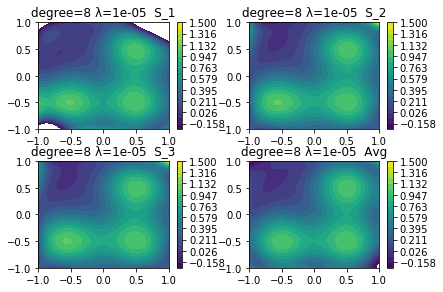

<Figure size 432x288 with 0 Axes>

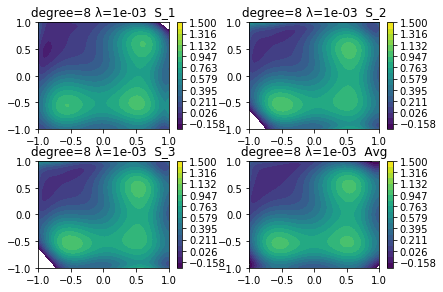

<Figure size 432x288 with 0 Axes>

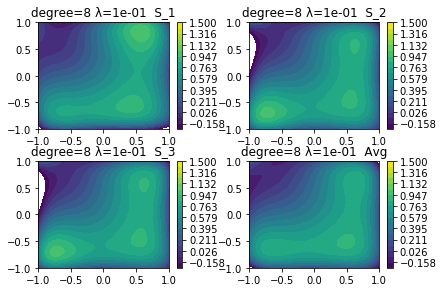

<Figure size 432x288 with 0 Axes>

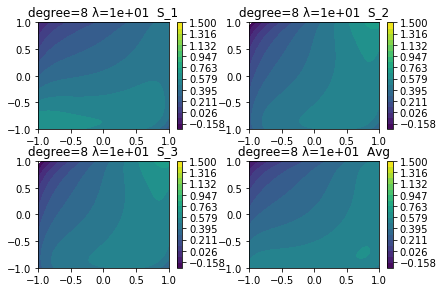

<Figure size 432x288 with 0 Axes>

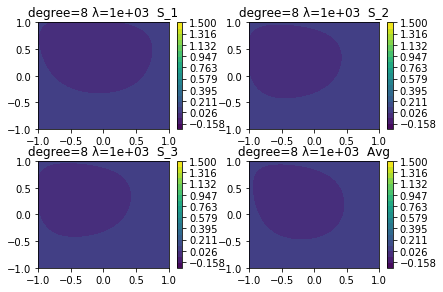

<Figure size 432x288 with 0 Axes>

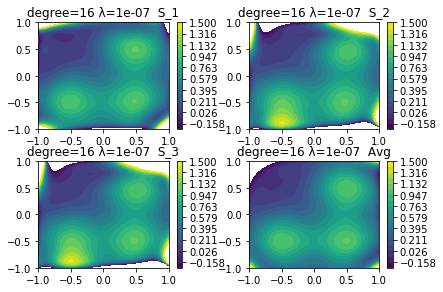

<Figure size 432x288 with 0 Axes>

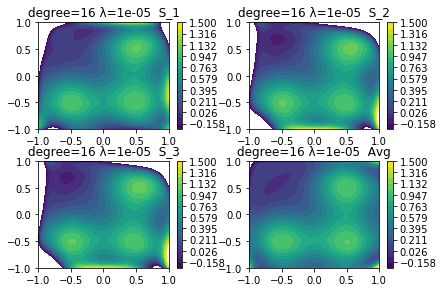

<Figure size 432x288 with 0 Axes>

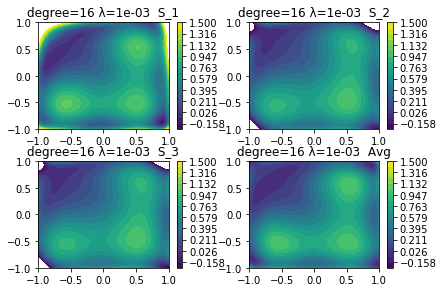

<Figure size 432x288 with 0 Axes>

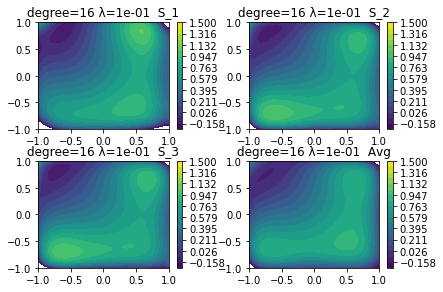

<Figure size 432x288 with 0 Axes>

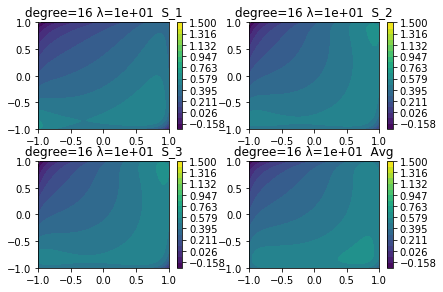

<Figure size 432x288 with 0 Axes>

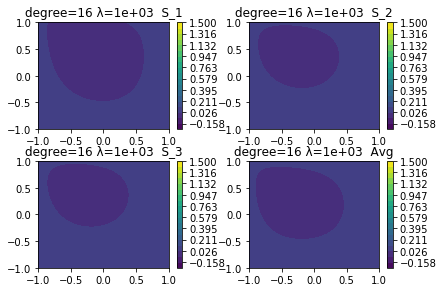

In [8]:
# Cell type : CodeWrite

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    
    X_test_0=X_test[:,0]
    #print(X_train_0,'\n''\n')
    X_test_1=X_test[:,1]
    
    fe_matrix=np.zeros(len(X_test))

    for i in range(degree+1):
        for j in range(degree+1):
            if i+j<=degree:
                n=(X_test_0**j)*(X_test_1**i)  
                n=np.array(n)
                fe_matrix=np.dstack((fe_matrix,n))
            else:
                break
    fe_matrix=fe_matrix[0] 

    fe_matrix=fe_matrix[:,1:]
    
    Y_test_pred=fe_matrix.dot(wt_vector)
    
    return Y_test_pred
    
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    
    # Get Z using other functions
    k=-1
    Z=np.zeros((100,100))
    for i in range(degree+1):
        for j in range(degree+1):
            if i+j<=degree:
                k+=1
                Z+=wt_vector[k]*(X**j)*(Y**i)

    
    plt.contourf(X,Y,Z,levels=np.linspace(-.25,1.5 , 20))
    plt.title(title)
    plt.colorbar()
    
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    
    
    
    X_train_0=X_train[:,0]
    #print(X_train_0,'\n''\n')
    X_train_1=X_train[:,1]

    new_dim=int((degree+2)*(degree+1)/2)
    fe_matrix=np.zeros(len(X_train))

    for i in range(degree+1):
        for j in range(degree+1):
            if i+j<=degree:
                n=(X_train_0**j)*(X_train_1**i)  
                #n=np.array(n)
                fe_matrix=np.dstack((fe_matrix,n))
            else:
                break
    fe_matrix=fe_matrix[0] 

    fe_matrix=fe_matrix[:,1:]
         
    
        
                  
    
    
    new_dim=int((degree+2)*(degree+1)/2)                   ##d'=(d+k)C(k)  where k is degree
    I=np.eye(new_dim)
    #print('degree=',degree)
    #print(fe_matrix)
    
    
    ## w 
    w=(np.linalg.inv(fe_matrix.transpose().dot(fe_matrix) + reg_param*I)).dot(fe_matrix.transpose().dot(Y_train)) 
    ##*(asterisk) is not matrix multiplier so use dot atribute
    return w
    


def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    
    
    
                           
                        ##generating data and findnig weight vectors
    new_dim=int((degree+2)*(degree+1)/2)
    w_s_0=np.zeros(new_dim)
    for t in range(100):
        idx=np.random.randint(10000,size=num_training_samples)
        
        X_train=X_data[idx]
        Y_train=Y_data[idx]
        w_s_0=np.vstack((w_s_0,polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)))
   
    w_s=w_s_0[1:]
    
    w_sum=np.zeros(new_dim)
    
    for i in w_s:
        w_sum+=i
    w_s_avg=w_sum/100                         ##expected/averaged paramteres / E(f_s)
    ##IMP print('w_s[0]  ',w_s[0],'w_s[1]  ',w_s_avg)
    ##plotting
    fig, axes = plt.subplots(2,2)
    fig.tight_layout()            ##makes spaces bw subplots 
    
    plt.subplot(2,2,1)
    visualise_polynomial_2d(w_s[0], degree, "degree=%i"%degree+" λ=%1.0e"%reg_param+"  S_1")
    
    plt.subplot(2,2,2)
    visualise_polynomial_2d(w_s[1], degree, "degree=%i"%degree+" λ=%1.0e"%reg_param+"  S_2")
    
    plt.subplot(2,2,3)
    visualise_polynomial_2d(w_s[1], degree, "degree=%i"%degree+" λ=%1.0e"%reg_param+"  S_3")
    
    plt.subplot(2,2,4)
    visualise_polynomial_2d(w_s_avg, degree, "degree=%i"%degree+" λ=%1.0e"%reg_param+"  Avg")
    
    
    
    ##calculating bias usnig 1000 data points(X_data,Y_data)
    X_use=X_data[0:1000]
    Y_use=Y_data[0:1000]
    b=sum((polynomial_regression_ridge_pred(X_use, w_s_avg, degree) - Y_use)**2)/len(X_use)
    b=round(b,7)
    
    ##calculating variance()
    v=0
    for i in range(len(w_s)):
        t=sum((polynomial_regression_ridge_pred(X_use, w_s[i], degree)-polynomial_regression_ridge_pred(X_use, w_s_avg, degree))**2)/1000
        v+=t
    v=v/100
    v=round(v,7)
    ##error 
    e=b+v
    
    
    
    
    return b,v,e
a=np.array([.5,.5])
b=np.array([-.5,-.5])
c=np.array([.5,-.5])    
    
    

X_data=np.random.uniform(-1,1,(10000,2))                 
Y_data=np.array([])
for i in X_data:
    y=np.exp(-4*(np.linalg.norm(i-a))**2)+np.exp(-4*(np.linalg.norm(i-b))**2)+np.exp(-4*(np.linalg.norm(i-c))**2)
    Y_data=np.append(Y_data,y)


    
    
for degree in [1,2,4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        plt.figure()
            
         
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        
        #print('================================')
        #print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        #print('Bias = '+str(b))
        #print('Variance = '+str(v))
        #print('MSE = '+str(e))
       

In [9]:
# Cell type: convenience



** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

<b>Bias</b>

|      | 1         | 2         | 4         | 8         | 16        |
|------|-----------|-----------|-----------|-----------|-----------|
| 1e-7 | 0.0537092 | 0.0325677 | 0.0064529 | 0.0071497 | 0.0213385 |
| 1e-5 | 0.0537044 | 0.0326172 | 0.006759  | 0.0052062 | 0.007808  |
| 1e-3 | 0.0537088 | 0.0326439 | 0.0064436 | 0.0040074 | 0.0054887 |
| 1e-1 | 0.0537719 | 0.0326897 | 0.0093886 | 0.0088758 | 0.0094048 |
| 1e1  | 0.0663156 | 0.0612059 | 0.0596784 | 0.0555839 | 0.0541853 |
| 1e3  | 0.3124922 | 0.3093932 | 0.307871  | 0.3073679 | 0.3070254 |

increasing value of $\lambda$ results in increase in bias almost all the time,<br>
and increasing degree results in decrese in bias


<b>Variance</b>

|      | 1         | 2         | 4         | 8         | 16        |
|------|-----------|-----------|-----------|-----------|-----------|
| 1e-7 | 0.0039701 | 0.0049223 | 0.0066737 | 0.1179684 | 0.2546919 |
| 1e-5 | 0.0039962 | 0.0050172 | 0.0075861 | 0.045967  | 0.1149808 |
| 1e-3 | 0.0037082 | 0.0055836 | 0.008974  | 0.0141293 | 0.0421897 |
| 1e-1 | 0.0032296 | 0.0046508 | 0.0042264 | 0.0063614 | 0.0090047 |
| 1e1  | 0.0015166 | 0.0014729 | 0.0023168 | 0.0025931 | 0.0026572 |
| 1e3  | 6.7e-06   | 7.7e-06   | 1.03e-05  | 1.27e-05  | 1.62e-05  | 

As value of $\lambda$ increases variance decreases<br>
and almost all the time as degree increases variance increases

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




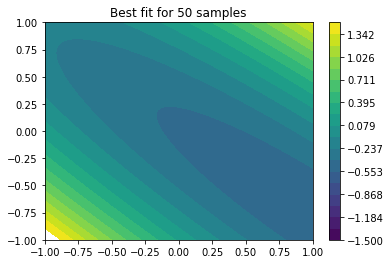

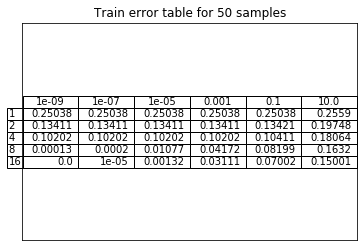

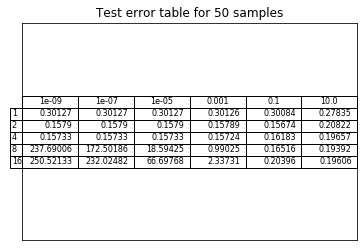

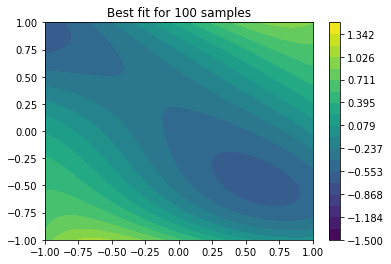

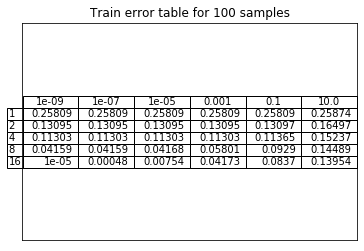

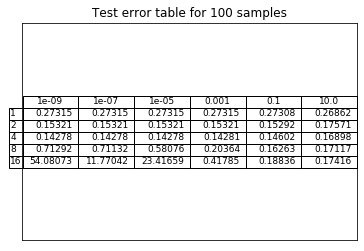

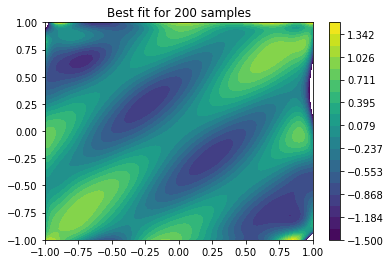

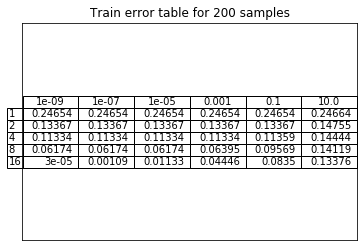

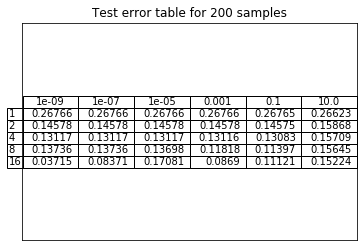

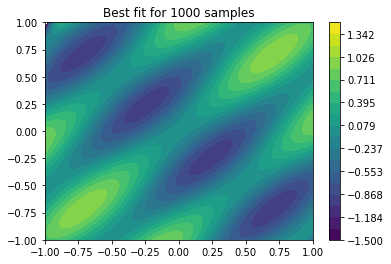

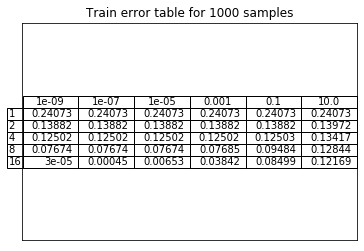

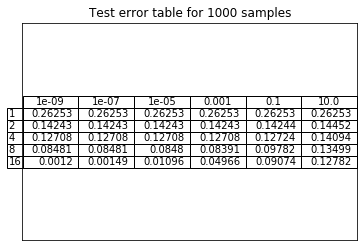

In [10]:
# Cell type : CodeWrite 
data=np.load('dataset4_1.npz')        ##importing data files
lis=data.files                        ##list of array names

X_train=data[lis[0]]
Y_train=data[lis[1]]
X_test=data[lis[2]]
Y_test=data[lis[3]]

#print(X_train,'\n ',Y_train)
#print(   np.random.uniform(-1,1,(10000,2)) )
train_err_matrix=np.zeros((5,6))    
test_err_matrix=np.zeros((5,6))   
#print(clust_data)



#matrices_train_err = np.zeros(4)
#matrices_test_err  = np.zeros(4)

k=-1
for no_samples in [50,100,200,1000]:
    k+=1
    
    X_train_s=X_train[:no_samples]      ##getting different sizes of training sets
    Y_train_s=Y_train[:no_samples]
    
    i=-1
    for degree in [1,2,4,8,16]:
        i+=1
        
        j=-1
        for reg_param in [1e-9,1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
            j+=1
            wt_vector      =   polynomial_regression_ridge_train(X_train_s, Y_train_s, degree, reg_param)
            Y_train_pred   =   polynomial_regression_ridge_pred(X_train_s, wt_vector, degree)
            Y_test_pred    =   polynomial_regression_ridge_pred(X_test, wt_vector, degree)
            
            train_err_matrix[i,j]  =   round(sum((Y_train_pred-Y_train_s)**2)/len(Y_train_s),5)
            test_err_matrix[i,j]   =   round(sum((Y_test_pred-Y_test)**2)/len(Y_test),5)
    
    #print('train_err_matrix''\n',train_err_matrix)
    #print('test_err_matrix''\n',test_err_matrix)
    best_hyp=np.argwhere(test_err_matrix==np.min(test_err_matrix))
    
    rows=[1,2,4,8,16]
    cols=[1e-9,1e-7, 1e-5, 1e-3, 1e-1, 1e1]
    
    #print('best hyp',best_hyp)
    for i in range(5):
        if best_hyp[0][0]==i:
            best_degree=rows[i]
    
    for i in range(6):
        if best_hyp[0][1]==i:
            best_lambda=cols[i]
    #print('best',best_degree,best_lambda)
    

    ##getting wts for best_hyp
    wt_best     =   polynomial_regression_ridge_train(X_train_s, Y_train_s, best_degree, best_lambda)
    
    
    #################
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    
    # Get Z using other functions
    k=-1
    Z=np.zeros((100,100))
    for i in range(best_degree+1):
        for j in range(best_degree+1):
            if i+j<=best_degree:
                k+=1
                Z+=wt_best[k]*(X**j)*(Y**i)

    
    plt.contourf(X,Y,Z,levels=np.linspace(-1.5,1.5 , 20))
    plt.title('Best fit for '+str(no_samples)+' samples')
    plt.colorbar()
    
    ##############
                                  ##tables
    #print('Training error matrix for '+str(no_samples)+' samples')
    
      
    fig, ax = plt.subplots()

    # Hide axes
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False)
    
    ax.table(cellText=train_err_matrix, rowLabels=[1,2,4,8,16],colLabels=[1e-9,1e-7, 1e-5, 1e-3, 1e-1, 1e1],loc='center')
    plt.title('Train error table for '+str(no_samples)+' samples')
    
    plt.show()
    
    
    #print('Test error matrix for '+str(no_samples)+' samples')
    
    fig, ax = plt.subplots()

    # Hide axes
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False)
    
    
    ax.table(cellText=test_err_matrix, rowLabels=[1,2,4,8,16],colLabels=[1e-9,1e-7, 1e-5, 1e-3, 1e-1, 1e1],loc='center')
     
    plt.title('Test error table for '+str(no_samples)+' samples')
        
    plt.show()
    #matrices_train_err[k] = train_err_matrix
    #matrices_test_err[k]  = test_err_matrix
    

    
    
    

** Cell type : TextWrite **

<b>Best degree/Regular parameter table</b>:

| Size  | Degree  |  Parameter
|---|---|---|
|  50 |  2 | 0.1  |  
| 100  | 4  |  1e-09 
| 200  |  16 | 1e-09 
| 1000  | 16  | 1e-09 

<b>no_samples</b>=50<br><br>
Train error

|    | 1e-9   | 1e-7   | 1e-5   | 1e-3    | 1e-1   | 1e1    |
|----|--------|--------|--------|---------|--------|--------|
| 1  | .25038 | .25038 | .25038 | .25038  | .25038 | .2559  |
| 2  | .13411 | .13411 | .13411 | .13411  | .13421 | .19748 |
| 4  | .10202 | .10202 | .10202 | .10202  | .10411 | .18064 |
| 8  | .00013 | .0002  | .01077 | .004172 | .08199 | .1632  |
| 16 | 0      | 1e-5   | .00132 | .03111  | .07002 | .15001 |

Test error

|    | 1e-9      | 1e-7      | 1e-5     | 1e-3    | 1e-1   | 1e1    |
|----|-----------|-----------|----------|---------|--------|--------|
| 1  | .30127    | .30127    | .30127   | .30126  | .30084 | .27835 |
| 2  | .1579     | .1579     | .1579    | .15789  | .15674 | .20822 |
| 4  | .15733    | .15733    | .15733   | .15724  | .16183 | .19657 |
| 8  | 237.69006 | 172.50186 | 18.59425 | .99025  | .16516 | .19392 |
| 16 | 250.52133 | 232.02482 | 66.69768 | 2.33731 | .20936 | .19606 |

<b>no_samples</b>=100<br><br>
Train error

|    | 1e-9   | 1e-7   | 1e-5   | 1e-3   | 1e-1   | 1e1    |
|----|--------|--------|--------|--------|--------|--------|
| 1  | .25809 | .25809 | .25809 | .25809 | .25809 | .25874 |
| 2  | .13095 | .13095 | .13095 | .13095 | .13097 | .16497 |
| 4  | .11303 | .11303 | .11303 | .11303 | .11365 | .15237 |
| 8  | .04159 | .04159 | .04168 | .05801 | .0929  | .14489 |
| 16 | 1e-5   | .00048 | .00754 | .04173 | .0837  | .13954 |

Test error

|    | 1e-9     | 1e-7     | 1e-5     | 1e-3   | 1e-1   | 1e1    |
|----|----------|----------|----------|--------|--------|--------|
| 1  | .27315   | .27315   | .27315   | .27315 | .27308 | .26862 |
| 2  | .15321   | .15321   | .15321   | .15321 | .15292 | .17571 |
| 4  | .14278   | .14278   | .14278   | .14281 | .14602 | .16898 |
| 8  | .71292   | .71132   | .58076   | .20364 | .16263 | .17117 |
| 16 | 54.08073 | 11.77042 | 23.41659 | .41785 | .18836 | .17416 |

<b>no_samples</b>=200<br><br>
Train error

|    | 1e-9   | 1e-7   | 1e-5   | 1e-3   | 1e-1   | 1e1    |
|----|--------|--------|--------|--------|--------|--------|
| 1  | .24654 | .24654 | .24654 | .24654 | .24654 | .24664 |
| 2  | .13367 | .13367 | .13367 | .13367 | .13367 | .14755 |
| 4  | .11334 | .11334 | .11334 | .11334 | .11359 | .14444 |
| 8  | .06174 | .06174 | .06174 | .06395 | .09569 | .14119 |
| 16 | 3e-5   | .00109 | .01133 | .04446 | .0835  | .13376 |

Test error

|    | 1e-9   | 1e-7   | 1e-5   | 1e-3   | 1e-1   | 1e1    |
|----|--------|--------|--------|--------|--------|--------|
| 1  | .26766 | .26766 | .26766 | .26766 | .26765 | .26623 |
| 2  | .14578 | .14578 | .14578 | .14578 | .14575 | .15868 |
| 4  | .13117 | .13117 | .13117 | .13116 | .13083 | .15709 |
| 8  | .13736 | .13736 | .13698 | .11818 | .11397 | .15645 |
| 16 | .03715 | .08371 | .1081  | .0869  | .11121 | .15224 |

<b>no_samples</b>=1000<br><br>

Train error

|    | 1e-9   | 1e-7   | 1e-5   | 1e-3   | 1e-1   | 1e1    |
|----|--------|--------|--------|--------|--------|--------|
| 1  | .24073 | .24073 | .24073 | .24073 | .24073 | .24073 |
| 2  | .13882 | .13882 | .13882 | .13882 | .13882 | .13972 |
| 4  | .12502 | .12502 | .12502 | .12502 | .12503 | .13417 |
| 8  | .07674 | .07674 | .07674 | .07685 | .09484 | .12844 |
| 16 | 3e-5   | .00045 | .00653 | .03842 | .08499 | .12169 |

Test error

|    | 1e-9   | 1e-7   | 1e-5   | 1e-3   | 1e-1   | 1e1    |
|----|--------|--------|--------|--------|--------|--------|
| 1  | .26253 | .26253 | .26253 | .26253 | .26253 | .26253 |
| 2  | .14243 | .14243 | .14243 | .14243 | .14244 | .14452 |
| 4  | .12708 | .12708 | .12708 | .12708 | .12724 | .14094 |
| 8  | .08481 | .08481 | .08488 | .08391 | .09782 | .13499 |
| 16 | .0012  | .00149 | .01096 | .04966 | .09074 | .12782 |

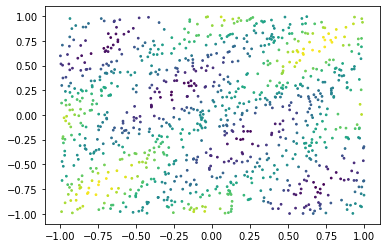

In [14]:
import numpy as np
import matplotlib.pyplot as plt

data=np.load('dataset4_1.npz')        ##importing data files
lis=data.files                        ##list of array names

X_train=data[lis[0]]
Y_train=data[lis[1]]


plt.figure()
plt.scatter(X_train[:,0],X_train[:,1], s=3, c=Y_train, marker='o')
plt.show()


In [10]:
X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
X

array([[-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       ...,
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ]])